In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.7.0


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
import matplotlib.pyplot as plt

In [10]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 795us/step - loss: 0.2630 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 1s 793us/step - loss: 0.1077 - accuracy: 0.9663
Epoch 3/3
1875/1875 [==============================] - 1s 792us/step - loss: 0.0723 - accuracy: 0.9771


In [13]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 0s 560us/step - loss: 0.0987 - accuracy: 0.9702
0.09866313636302948 0.9702000021934509


In [14]:
model.save('num_reader_model')

INFO:tensorflow:Assets written to: num_reader_model\assets


In [15]:
new_model = tf.keras.models.load_model('num_reader_model')

In [16]:
predictions = new_model.predict([x_test])

In [17]:
import numpy as np

In [19]:
print(np.argmax(predictions[0]))

7


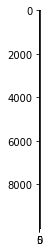

In [20]:
plt.imshow(predictions)
plt.show()